<a href="https://colab.research.google.com/github/Gaurav0771/Ml-Tutorials/blob/main/Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/cars_24_combined.csv')

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)


<ipython-input-1-60552079f048>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [2]:
# Select relevant columns for PCA
X = df[['Year', 'Distance', 'Owner', 'Price']]


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [4]:
from sklearn.decomposition import PCA

# Create a PCA instance with the number of components you want to retain
n_components = 3  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data
pca.fit(X_std)


PCA(n_components=3)

In [5]:
# Transform the data into the new feature space
X_pca = pca.transform(X_std)


In [6]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)


Explained Variance Ratios: [0.45798055 0.22480274 0.20287386]


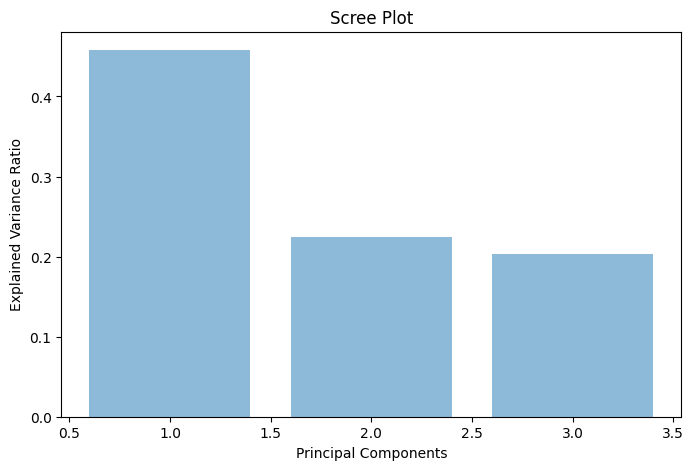

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


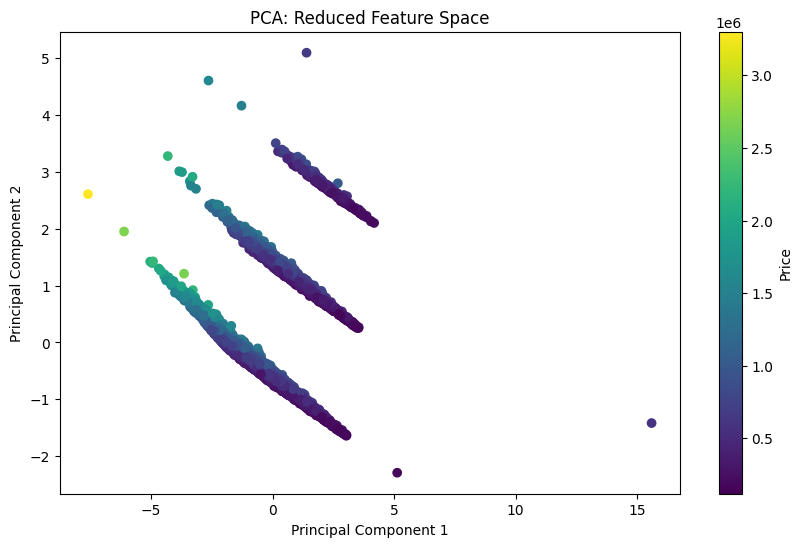

In [8]:
if n_components > 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Price'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: Reduced Feature Space')
    plt.colorbar(label='Price')
    plt.show()
